In [37]:
import numpy as np
import pandas as pd
import talib as ta
import mplfinance as mpf
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'
plt.rcParams["figure.figsize"] = (15, 7.5)

In [38]:
data = web.DataReader("AMZN", "yahoo")

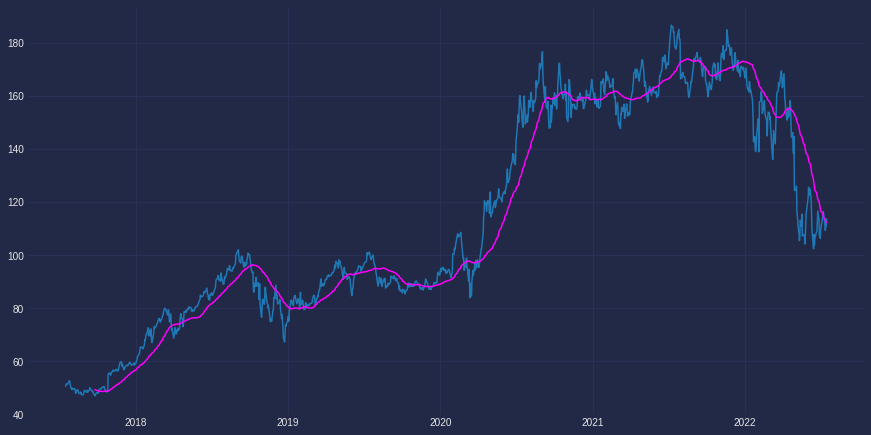

In [39]:
data['SMA_50'] = ta.SMA(data['Close'], 50)

plt.plot(data['Close'])
plt.plot(data['SMA_50'], color="magenta")
plt.grid(color='#2A3459')
plt.show()

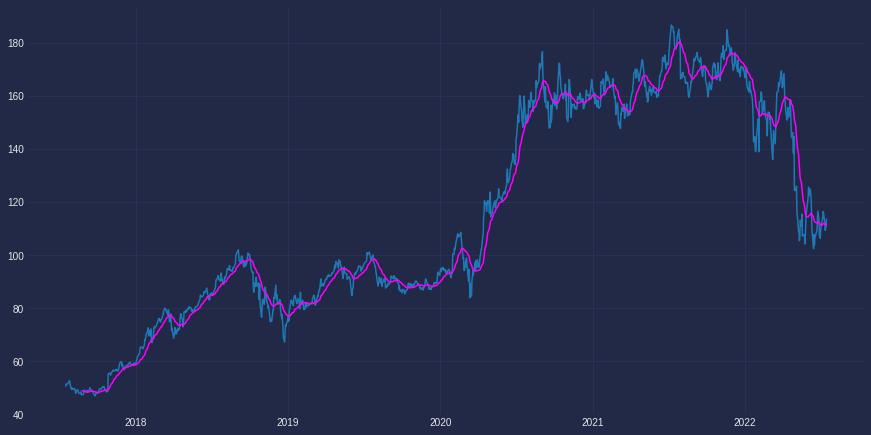

In [40]:
data['WMA'] = ta.WMA(data['Close'])
plt.plot(data['Close'])
plt.plot(data['WMA'], color="magenta")
plt.grid(color='#2A3459')
plt.show()

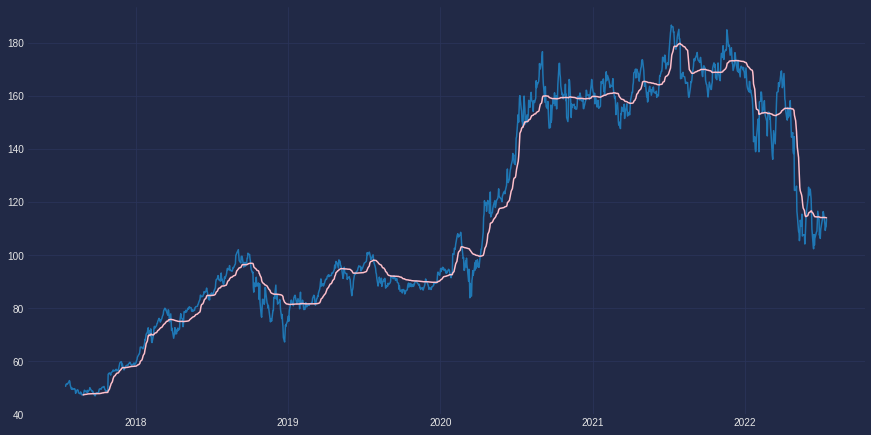

In [41]:
data['KAMA'] = ta.KAMA(data['Close'])
plt.plot(data['Close'])
plt.plot(data['KAMA'], color="pink")
plt.grid(color='#2A3459')
plt.show()

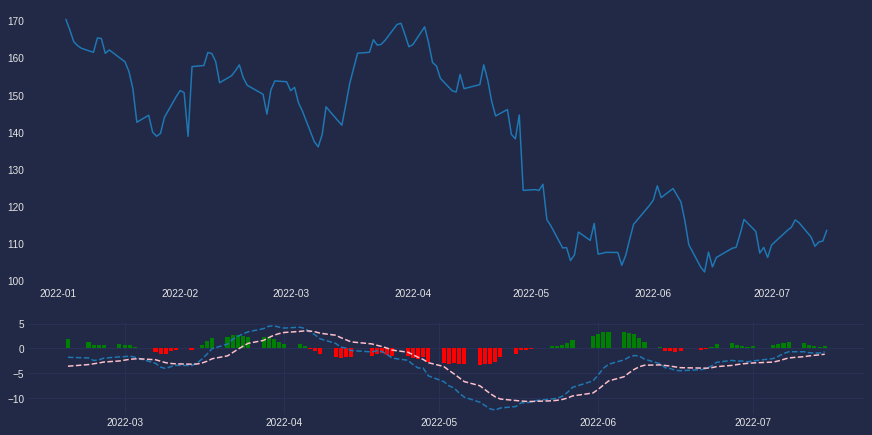

In [53]:
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()

data = web.DataReader("AMZN", "yahoo", start, end)
macd, macd_signal, macd_hist = ta.MACD(data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(data['Close'])
axs[1].plot(macd, linestyle="--")
axs[1].plot(macd_signal, "--", color="pink")
axs[1].bar(macd_hist.index, macd_hist, color=c)
plt.grid(color='#2A3459')
plt.show()

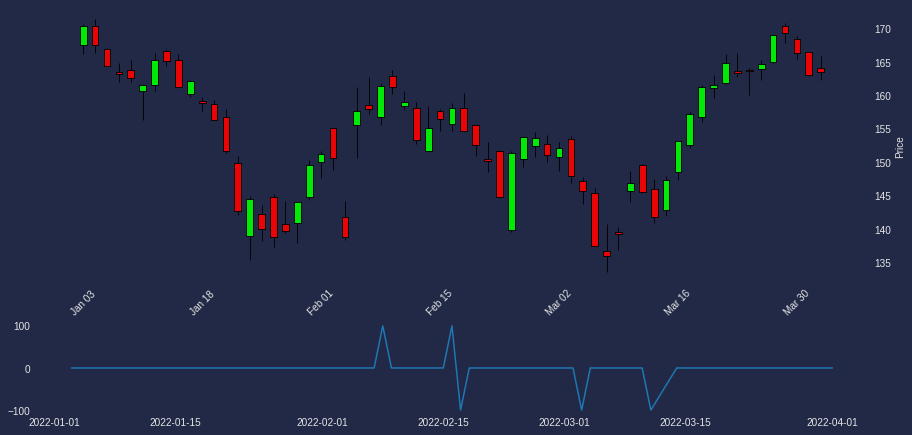

In [52]:
start = dt.datetime(2022, 1, 1)
end = dt.datetime(2022, 4, 1)

data = web.DataReader("AMZN", "yahoo", start, end)
data['ENGULFING'] = ta.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})

colors = mpf.make_marketcolors(up='#00ff00', down='#ff0000')
mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=colors)

mpf.plot(data, type='candle', ax=axs[0], style=mpf_style)
axs[1].plot(data['ENGULFING'])
plt.show()